# Simple Googlifying of a few pictures!
To start, you can find a config dictionary, to manually modify values and see what happens!


In [8]:
# If notebook can't find src, this in necessary to add the parent folder to the path.
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from src.googlifier import Googlifier
config={
    "model":{
        "face_model":{
            "type": "DNN",
            "DNN":{
                "prototxt": "../models/deploy.prototxt",
                "caffemodel": "../models/res10_300x300_ssd_iter_140000_fp16.caffemodel"
            }
        },
        "eye_model":{
            "type": "HOG",
            "HOG":{
                "eyes_landmarks": "../models/eye_eyebrows_22.dat"
            }
        }
    },
    "googly_path": "../data/googly1.png",
    "service": {
        "confidence_threshold": 0.5,
        "googly_settings": {
            "random_max_percent_inc":0.5,
            "size_multiplier":2
        }
    
    }
}
googlifier = Googlifier(config)

### First case - Solo, jpg
To start, we have a very simple case: a .jpeg image of a frontal face.

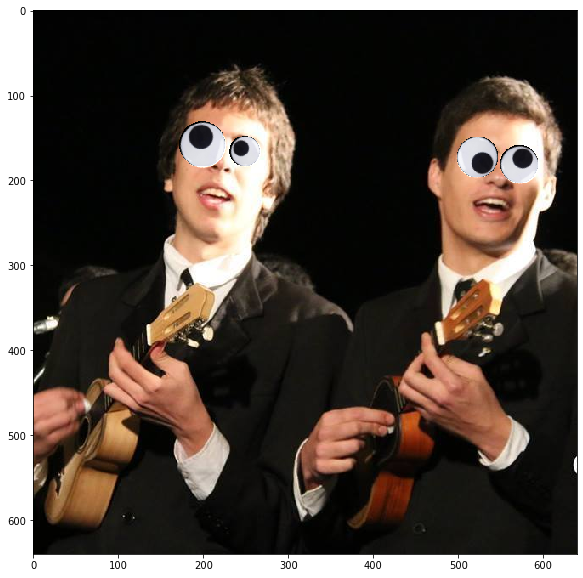

In [32]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

solo = cv2.imread('data/alex.jpg')
solo_googlified = googlifier.googlify_picture(solo)
plt.figure(figsize=(10,10))

plt.imshow(cv2.cvtColor(solo_googlified, cv2.COLOR_BGR2RGB))

Good, it seems like it works!
### First case - Couple, png
Now, a picture where there's more than one individual, and one of the two persons is slightly blurred.

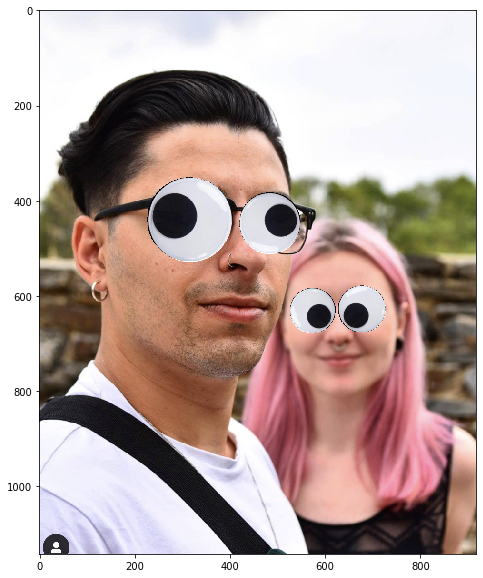

In [21]:
couple = cv2.imread('data/couple.png')
couple_googlified = googlifier.googlify_picture(couple)
plt.figure(figsize=(10,10))

plt.imshow(cv2.cvtColor(couple_googlified, cv2.COLOR_BGR2RGB))

Great, it worked!
### Third case - Group, png
What if there's a high count of people?

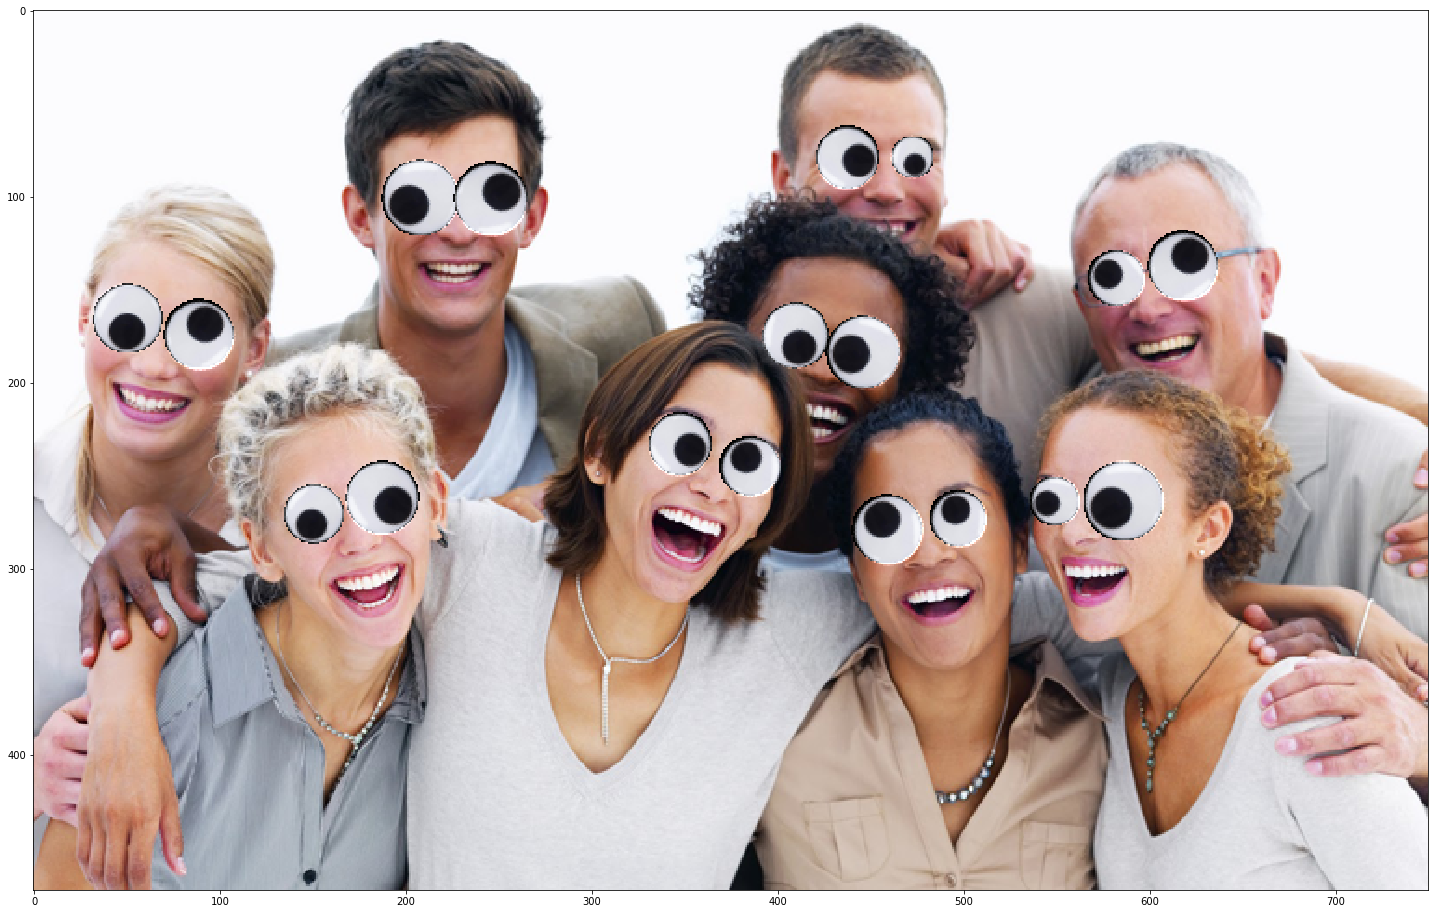

In [22]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

group = cv2.imread('data/group.png')
group_googlified = googlifier.googlify_picture(group)
plt.figure(figsize=(25,25))

plt.imshow(cv2.cvtColor(group_googlified, cv2.COLOR_BGR2RGB))

Done, and reasonably fast! How fast? Observe below!

In [25]:
%timeit googlifier.googlify_picture(solo)
%timeit googlifier.googlify_picture(couple)
%timeit googlifier.googlify_picture(group)

33.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.3 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
[x for x in range(1)]

[0]